#Music Transcription System

preprosseing


Filtered audio saved to audio/filtered_audio.wav


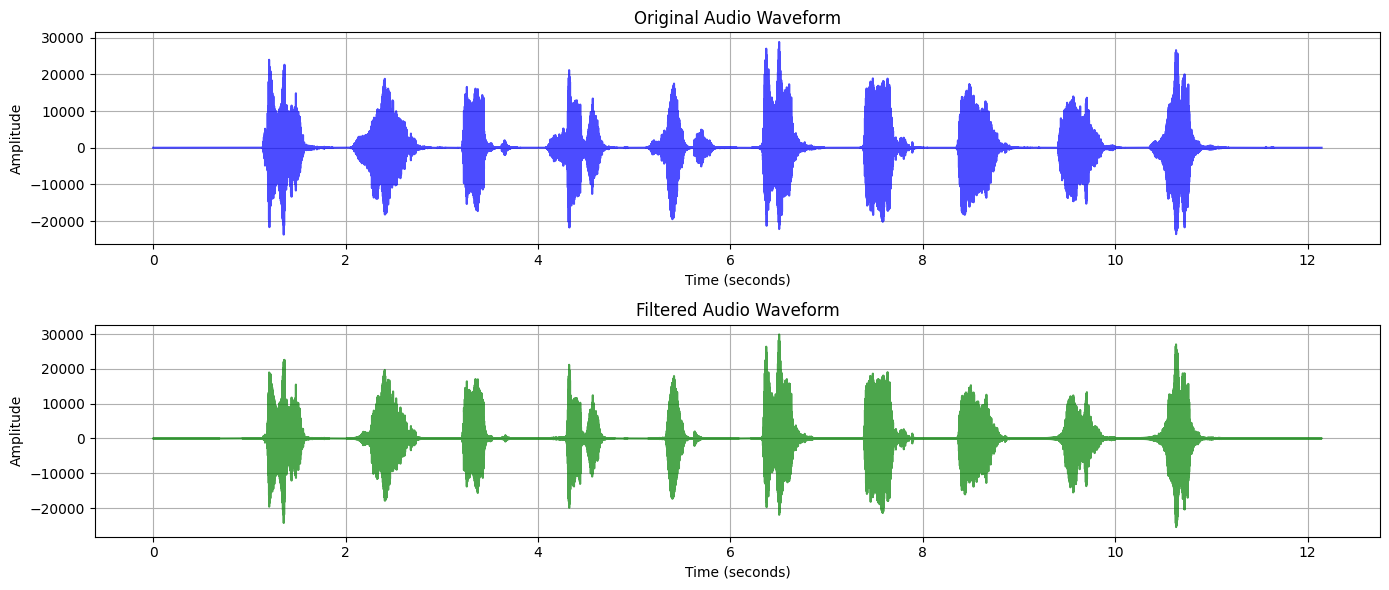

In [101]:
import numpy as np
import wave
import matplotlib.pyplot as plt

# Correct file path
file_path = 'audio/audio.wav'

def read_wav(file_path):
    """
    Reads a .wav file and returns the sample rate and audio data.
    """
    try:
        with wave.open(file_path, 'rb') as wf:
            sample_rate = wf.getframerate()
            num_frames = wf.getnframes()
            audio_data = np.frombuffer(wf.readframes(num_frames), dtype=np.int16)

            # Convert stereo to mono if needed
            if wf.getnchannels() > 1:
                audio_data = audio_data.reshape(-1, wf.getnchannels())
                audio_data = np.mean(audio_data, axis=1).astype(np.int16)
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found. Please check the path.")
        raise
    except wave.Error as e:
        print(f"Error reading WAV file: {e}")
        raise

    return sample_rate, audio_data

def spectral_filtering(audio_data, sample_rate, low_cut=300, high_cut=3000):
    """
    Performs spectral filtering using FFT.
    """
    n = len(audio_data)
    freq = np.fft.rfftfreq(n, d=1/sample_rate)
    fft_spectrum = np.fft.rfft(audio_data)

    # Create a frequency mask for the desired frequency range
    mask = (freq > low_cut) & (freq < high_cut)
    fft_spectrum[~mask] = 0

    # Perform the inverse FFT
    filtered_audio = np.fft.irfft(fft_spectrum)
    return np.int16(filtered_audio)

def save_wav(file_path, audio_data, sample_rate):
    """
    Saves the processed audio data to a .wav file.
    """
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(1)  # Mono audio
        wf.setsampwidth(2)  # 2 bytes per sample (16-bit audio)
        wf.setframerate(sample_rate)
        wf.writeframes(audio_data.tobytes())

def plot_waveforms(original_audio, filtered_audio, sample_rate):
    """
    Plots the waveforms of the original and filtered audio signals.
    """
    time_original = np.linspace(0, len(original_audio) / sample_rate, num=len(original_audio))
    time_filtered = np.linspace(0, len(filtered_audio) / sample_rate, num=len(filtered_audio))

    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_original, original_audio, color='blue', alpha=0.7)
    plt.title("Original Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time_filtered, filtered_audio, color='green', alpha=0.7)
    plt.title("Filtered Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    # Input and output file paths
    input_file = 'audio/audio.wav'
    output_file = 'audio/filtered_audio.wav'

    try:
        # Step 1: Read audio
        sample_rate, audio_data = read_wav(input_file)

        # Step 2: Spectral filtering
        filtered_audio = spectral_filtering(audio_data, sample_rate, low_cut=300, high_cut=3000)

        # Step 3: Save filtered audio
        save_wav(output_file, filtered_audio, sample_rate)
        print(f"Filtered audio saved to {output_file}")

        # Step 4: Plot original and filtered waveforms
        plot_waveforms(audio_data, filtered_audio, sample_rate)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Spectral ANalysis

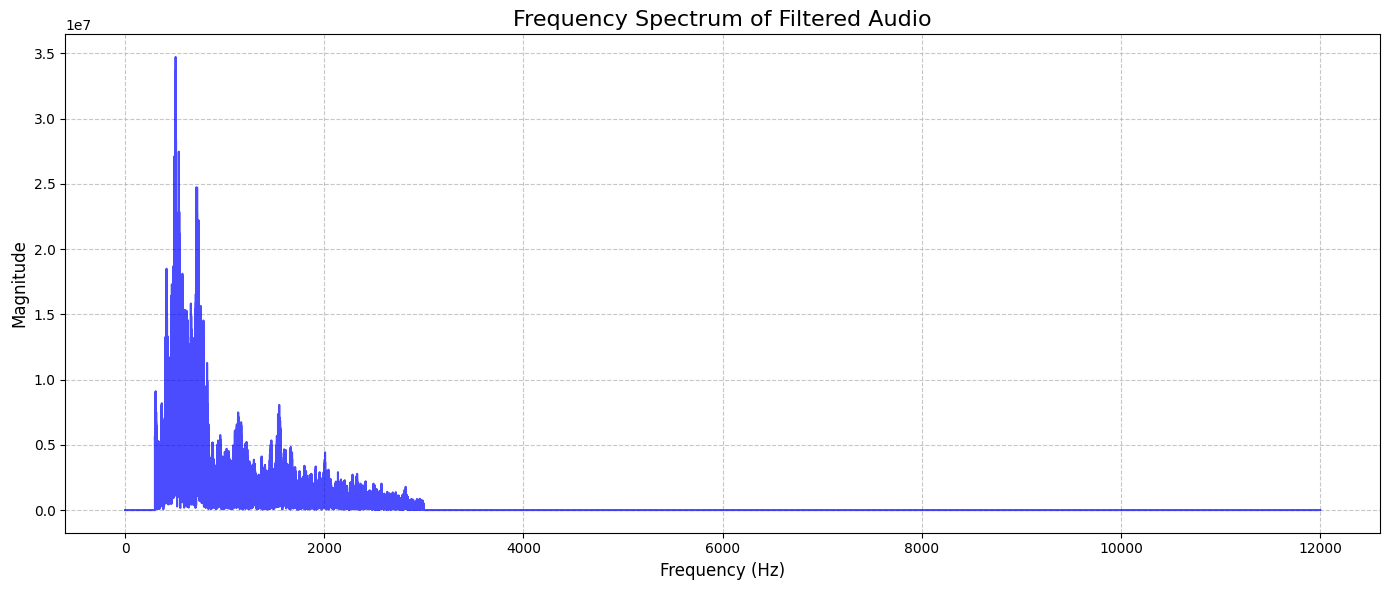

Filtered audio saved to: audio/audio_spectral.wav


In [102]:
import numpy as np
import wave
import matplotlib.pyplot as plt
file_path='audio/filtered_audio.wav'
# Function to read the .wav file
def read_wav(file_path):
    with wave.open(file_path, 'rb') as wf:
        sample_rate = wf.getframerate()
        num_frames = wf.getnframes()
        audio_data = np.frombuffer(wf.readframes(num_frames), dtype=np.int16)

        # Convert stereo to mono if needed
        if wf.getnchannels() > 1:
            audio_data = audio_data.reshape(-1, wf.getnchannels())
            audio_data = np.mean(audio_data, axis=1).astype(np.int16)

    return sample_rate, audio_data

# Function to save the processed .wav file
def save_wav(file_path, audio_data, sample_rate):
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(1)  # Mono audio
        wf.setsampwidth(2)  # 16-bit PCM
        wf.setframerate(sample_rate)
        wf.writeframes(audio_data.tobytes())

# Function to perform spectral filtering and analysis
def spectral_analysis(audio_data, sample_rate, low_cut=300, high_cut=3000, output_path='output.wav'):
    """
    Performs spectral analysis and saves the processed audio.
    
    Parameters:
        audio_data: np.array, input audio data.
        sample_rate: int, sampling rate of the audio.
        low_cut: int, low-frequency cutoff (Hz).
        high_cut: int, high-frequency cutoff (Hz).
        output_path: str, path to save the processed .wav file.
    
    Returns:
        freq: np.array, frequency bins.
        magnitude: np.array, magnitude of FFT.
        filtered_audio: np.array, the reconstructed audio signal.
    """
    # FFT
    n = len(audio_data)
    fft_spectrum = np.fft.rfft(audio_data)
    freq = np.fft.rfftfreq(n, d=1/sample_rate)

    # Apply a frequency mask
    mask = (freq > low_cut) & (freq < high_cut)
    fft_spectrum[~mask] = 0

    # Inverse FFT
    filtered_audio = np.fft.irfft(fft_spectrum).astype(np.int16)

    # Save the filtered audio
    save_wav(output_path, filtered_audio, sample_rate)

    # Return frequency spectrum for plotting
    magnitude = np.abs(fft_spectrum)
    return freq, magnitude, filtered_audio

# Function to plot the frequency spectrum
def plot_frequency_spectrum(freq, magnitude, title="Frequency Spectrum"):
    plt.figure(figsize=(14, 6))
    plt.plot(freq, magnitude, color='blue', alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency (Hz)", fontsize=12)
    plt.ylabel("Magnitude", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Input and output file paths
    input_file = 'audio/audio.wav'  # Input file path
    output_file = 'audio/audio_spectral.wav'  # Output file path

    # Step 1: Read audio
    sample_rate, audio_data = read_wav(input_file)

    # Step 2: Perform spectral analysis and save filtered audio
    freq, magnitude, filtered_audio = spectral_analysis(
        audio_data, sample_rate, low_cut=300, high_cut=3000, output_path=output_file
    )

    # Step 3: Plot the frequency spectrum
    plot_frequency_spectrum(freq, magnitude, title="Frequency Spectrum of Filtered Audio")

    print(f"Filtered audio saved to: {output_file}")

if __name__ == "__main__":
    main()


Pitch Detection

x Shape= (192000,)
Sample rate fs= 16000
Audio Length in seconds=12 [s]
STFT Matrix Shape: (1025, 186)
Frequencies Shape: (1025,)
Times Shape: (186,)
Detected Onsets (seconds): [ 0.448  1.152  2.368  3.328  4.288  5.312  6.464  7.424  8.384  9.472
 10.56  11.584]


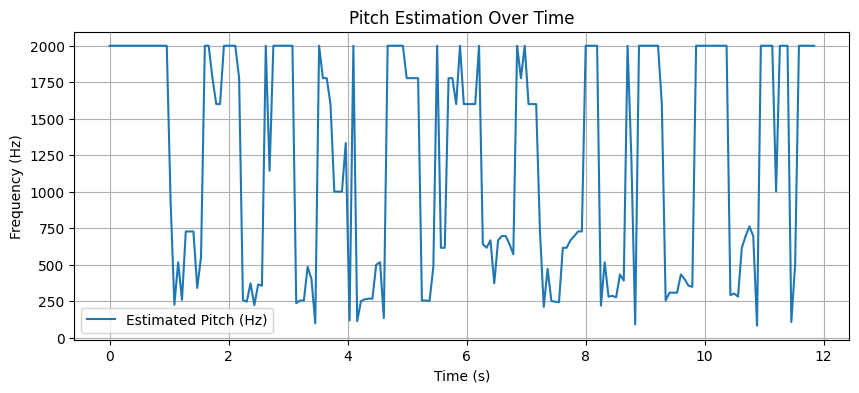

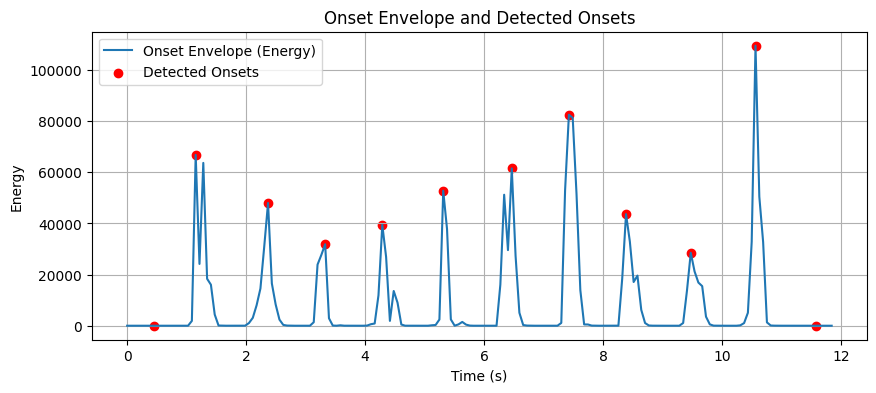

In [103]:
import wave
import numpy as np
from scipy.signal import resample
import IPython.display as ipd
import matplotlib.pyplot as plt
filename='audio/audio.wav'

def load_audio(filename, sr=None, mono=True, duration=None):
    """
    Load an audio file without using librosa.
    
    Parameters:
    - filename: Path to the audio file.
    - sr: Target sampling rate. If None, use the file's original sampling rate.
    - mono: If True, convert audio to mono.
    - duration: Duration to load in seconds. If None, load the full file.
    
    Returns:
    - x: Loaded audio signal (numpy array).
    - fs: Sampling rate of the audio file.
    """
    # Open the wave file
    with wave.open(filename, 'rb') as wf:
        # Get the audio parameters
        fs = wf.getframerate()
        n_channels = wf.getnchannels()
        n_frames = wf.getnframes()
        
        # Calculate the total duration of the audio
        total_duration = n_frames / fs
        
        # Limit the duration if specified
        if duration is not None:
            n_frames_to_read = int(min(duration, total_duration) * fs)
        else:
            n_frames_to_read = n_frames
        
        # Read the audio frames
        frames = wf.readframes(n_frames_to_read)
        audio = np.frombuffer(frames, dtype=np.int16)
        
        # Reshape if stereo or multi-channel
        if n_channels > 1:
            audio = audio.reshape(-1, n_channels)
            if mono:
                # Convert to mono by averaging channels
                audio = audio.mean(axis=1)
        
        # Normalize to float32 range (-1, 1)
        audio = audio.astype(np.float32) / np.iinfo(np.int16).max
        
        # Resample if needed
        if sr is not None and sr != fs:
            audio = resample(audio, int(len(audio) * sr / fs))
            fs = sr
        
        return audio, fs


x, fs = load_audio(filename, sr=16000, mono=True, duration=12)
# Audio data information
print("x Shape=", x.shape)
print("Sample rate fs=", fs)
print("Audio Length in seconds=%d [s]" % (x.shape[0]/fs))
# Playback audio file
ipd.Audio(x, rate=fs)

def custom_stft(signal, fs, window_size, hop_size):
    """
    Compute the Short-Time Fourier Transform (STFT) of an audio signal.
    
    Args:
        signal (np.ndarray): Input audio signal (1D).
        fs (int): Sampling rate of the audio signal.
        window_size (int): Size of the FFT window.
        hop_size (int): Step size between successive windows.
        
    Returns:
        times (np.ndarray): Time values corresponding to each frame.
        frequencies (np.ndarray): Frequency values corresponding to each FFT bin.
        stft_matrix (np.ndarray): Complex STFT matrix (shape: [num_frequencies, num_frames]).
    """
    # Create a Hamming window
    window = np.hamming(window_size)
    
    # Number of frames
    num_frames = 1 + (len(signal) - window_size) // hop_size
    stft_matrix = np.zeros((window_size // 2 + 1, num_frames), dtype=complex)
    
    # Apply window and compute FFT for each frame
    for i in range(num_frames):
        start_idx = i * hop_size
        frame = signal[start_idx:start_idx + window_size]
        frame_windowed = frame * window
        fft_frame = np.fft.rfft(frame_windowed)  # Compute FFT (real-valued for efficiency)
        stft_matrix[:, i] = fft_frame

    # Compute time and frequency axes
    times = np.arange(num_frames) * hop_size / fs
    frequencies = np.fft.rfftfreq(window_size, d=1/fs)
    
    return times, frequencies, stft_matrix


window_size = 2048        # FFT window size
overlap = 0.5             # Overlap percentage
hop_size = int(window_size * (1 - overlap))

# Ensure the input signal is 1D
if len(x.shape) > 1:
    x = x[:, 0]  # Convert to mono by taking one channel

# Perform custom STFT
times, frequencies, stft_matrix = custom_stft(x, fs, window_size, hop_size)

# Compute magnitude (power spectrum)
magnitude = np.abs(stft_matrix)
magnitude_db = 20 * np.log10(np.maximum(magnitude, 1e-10))  # Convert to dB scale

# Print results
print("STFT Matrix Shape:", stft_matrix.shape)
print("Frequencies Shape:", frequencies.shape)
print("Times Shape:", times.shape)

from scipy.ndimage import maximum_filter

# Calculate energy
energy = np.sum(magnitude ** 2, axis=0)

# Detect peaks in the energy curve
pre_post_max = 6  # Tune for peak detection
onset_frames = maximum_filter(energy, size=pre_post_max, mode='constant') == energy
onsets = times[onset_frames]

print("Detected Onsets (seconds):", onsets)


def autocorrelation_pitch_estimation(signal, fs, min_freq=50, max_freq=2000):
    """
    Estimate pitch using the autocorrelation method.
    
    Args:
        signal (np.ndarray): Input audio signal (1D).
        fs (int): Sampling rate of the signal.
        min_freq (float): Minimum frequency to consider (Hz).
        max_freq (float): Maximum frequency to consider (Hz).
    
    Returns:
        pitch (float): Estimated pitch in Hz. Returns 0 if no pitch is found.
    """
    # Define the range of lags (in samples) for pitch detection
    min_lag = int(fs / max_freq)
    max_lag = int(fs / min_freq)
    
    # Compute the autocorrelation of the signal
    corr = np.correlate(signal, signal, mode="full")
    corr = corr[len(corr) // 2:]  # Use only the positive lags

    # Ignore the zero-lag peak
    corr[:min_lag] = 0

    # Find the lag corresponding to the maximum correlation
    lag = np.argmax(corr[min_lag:max_lag]) + min_lag

    # Convert lag to frequency (Hz)
    pitch = fs / lag if lag > 0 else 0
    return pitch

def frame_based_pitch_detection(signal, fs, frame_size, hop_size, min_freq=50, max_freq=2000):
    """
    Estimate pitch for each frame of the signal using the autocorrelation method.
    
    Args:
        signal (np.ndarray): Input audio signal (1D).
        fs (int): Sampling rate of the signal.
        frame_size (int): Size of each frame (in samples).
        hop_size (int): Step size between successive frames (in samples).
        min_freq (float): Minimum frequency to consider (Hz).
        max_freq (float): Maximum frequency to consider (Hz).
    
    Returns:
        pitches (list): List of estimated pitches (Hz) for each frame.
    """
    num_frames = 1 + (len(signal) - frame_size) // hop_size
    pitches = []

    for i in range(num_frames):
        # Extract the current frame
        start_idx = i * hop_size
        frame = signal[start_idx:start_idx + frame_size]

        # Apply pitch estimation
        pitch = autocorrelation_pitch_estimation(frame, fs, min_freq, max_freq)
        pitches.append(pitch)

    return pitches
    # Parameters



frame_size = 2048            # Size of each frame
hop_size = frame_size // 2   # 50% overlap

# Apply frame-based pitch detection
pitches = frame_based_pitch_detection(x, fs, frame_size, hop_size, min_freq=50, max_freq=2000)

# Convert to time axis for visualization
time_axis = np.arange(len(pitches)) * hop_size / fs

plt.figure(figsize=(10, 4))
plt.plot(time_axis, pitches, label="Estimated Pitch (Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Pitch Estimation Over Time")
plt.grid()
plt.legend()
plt.show()

# Visualize onset envelope (energy curve)
plt.figure(figsize=(10, 4))
plt.plot(times, energy, label="Onset Envelope (Energy)")
plt.scatter(onsets, [energy[np.argmin(abs(times - t))] for t in onsets], color='red', label="Detected Onsets")
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.title("Onset Envelope and Detected Onsets")
plt.grid()
plt.show()

Rhytm ANalysis

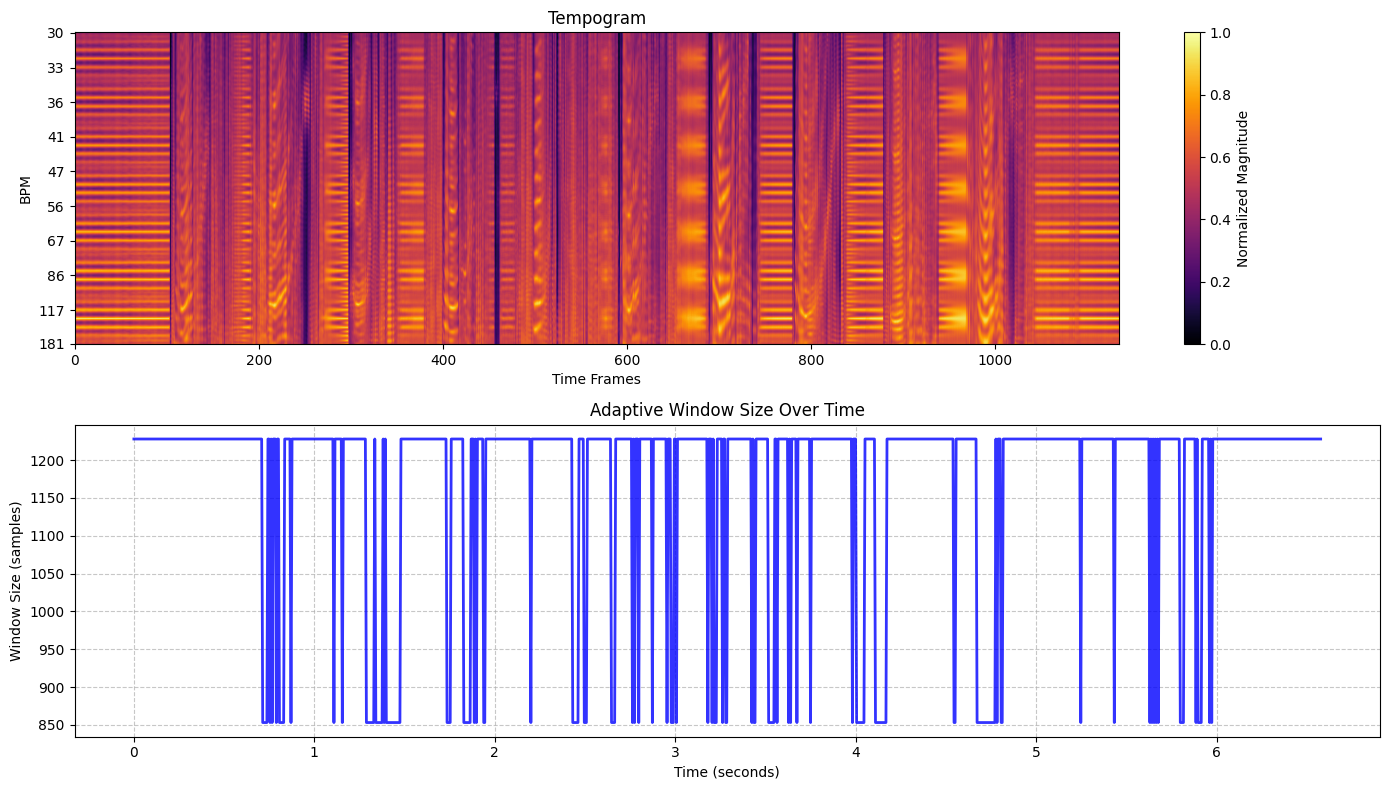

In [106]:
import numpy as np
import matplotlib.pyplot as plt
filename='audio/filtered_audio.wav'
def read_wav(filename):
    """
    Reads a .wav file as raw audio data.
    """
    with open(filename, 'rb') as f:
        f.seek(44)  # Skip WAV header
        data = np.frombuffer(f.read(), dtype=np.int16)
    return 44100, data  # Assuming 44.1kHz default

def compute_tempogram_with_adaptive_windowing(audio, sr, initial_win_length=512, hop_length=128, bpm_range=(30, 240), adapt_factor=1.2):
    """
    Computes a Fourier Tempogram with Adaptive Windowing.
    
    Parameters:
        audio: np.array, the input audio signal.
        sr: int, the sampling rate of the audio signal.
        initial_win_length: int, the initial window length for tempogram computation.
        hop_length: int, the hop length for window sliding.
        bpm_range: tuple, the minimum and maximum BPM range for analysis.
        adapt_factor: float, the factor by which the window size adapts to tempo changes.
    
    Returns:
        tempogram: np.array, the computed tempogram.
        adaptive_windows: list, the dynamically adjusted window sizes.
    """
    # Normalize audio to range [-1, 1]
    audio = audio.astype(float) / np.max(np.abs(audio))
    
    # Compute novelty function (energy difference across samples)
    novelty = np.abs(np.diff(audio))
    
    # Determine lag ranges based on BPM
    lag_min = int(max(1, 60 * sr / (hop_length * bpm_range[1])))
    lag_max = int(60 * sr / (hop_length * bpm_range[0]))
    
    # Determine valid frames and number of lags
    valid_frames = (len(novelty) - initial_win_length) // hop_length + 1
    num_lags = lag_max - lag_min + 1
    
    tempogram = np.zeros((num_lags, valid_frames))
    adaptive_windows = []  # Store the dynamic window sizes
    win_length = initial_win_length  # Initialize window length
    
    # Compute tempogram with adaptive windowing
    for i in range(valid_frames):
        start_idx = i * hop_length
        end_idx = start_idx + win_length
        
        if end_idx > len(novelty):  # Ensure within bounds
            break
        
        # Compute windowed autocorrelation
        window = novelty[start_idx:end_idx]
        ac = np.correlate(window, window, mode='full')
        ac = ac[len(ac)//2:]  # Positive lags
        ac = ac / (np.max(ac) + 1e-8)  # Normalize autocorrelation
        
        # Fill the tempogram matrix
        max_lag_length = min(num_lags, len(ac) - lag_min)
        tempogram[:max_lag_length, i] = ac[lag_min:lag_min + max_lag_length]
        
        # Estimate tempo: Find the peak BPM in the current frame
        if np.any(tempogram[:, i]):
            peak_lag = np.argmax(tempogram[:, i]) + lag_min
            peak_bpm = 60 * sr / (hop_length * peak_lag)
        else:
            peak_bpm = bpm_range[0]  # Default to minimum BPM
        
        # Adjust window length based on detected peak BPM
        if peak_bpm > np.mean(bpm_range):
            win_length = int(initial_win_length * adapt_factor)
        else:
            win_length = int(initial_win_length / adapt_factor)
        
        adaptive_windows.append(win_length)
    
    return tempogram, adaptive_windows

def plot_combined_tempogram(tempogram, adaptive_windows, sr, hop_length=128, bpm_range=(30, 240)):
    """
    Plots the tempogram and adaptive windowing effect together.
    
    Parameters:
        tempogram: np.array, the computed tempogram.
        adaptive_windows: list, dynamically adjusted window sizes.
        sr: int, the sampling rate.
        hop_length: int, the hop length between frames.
        bpm_range: tuple, the BPM range used for analysis.
    """
    plt.figure(figsize=(14, 8))

    # Plot the tempogram
    plt.subplot(2, 1, 1)
    plt.imshow(tempogram, aspect='auto', origin='lower', cmap='inferno', vmin=0, vmax=1)
    plt.colorbar(label='Normalized Magnitude')
    plt.ylabel('BPM')
    plt.xlabel('Time Frames')
    plt.title('Tempogram')
    
    lag_min = int(max(1, 60 * sr / (hop_length * bpm_range[1])))
    yticks = np.linspace(0, tempogram.shape[0] - 1, 10).astype(int)
    bpm_ticks = 60 * sr / (hop_length * (yticks + lag_min))
    plt.yticks(yticks, [f'{int(bpm)}' for bpm in bpm_ticks])
    
    # Plot the adaptive windowing effect
    plt.subplot(2, 1, 2)
    time_frames = np.arange(len(adaptive_windows)) * hop_length / sr
    plt.plot(time_frames, adaptive_windows, color='blue', linewidth=2, alpha=0.8)
    plt.title('Adaptive Window Size Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Window Size (samples)')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('tempogram_with_adaptive_windowing_fixed.png')
    plt.show()

# Main function
def main():
    # Read audio file
    sr, audio = read_wav('audio/filtered_audio.wav')
    
    # Compute tempogram with adaptive windowing
    tempogram, adaptive_windows = compute_tempogram_with_adaptive_windowing(
        audio, sr, initial_win_length=1024, hop_length=256, bpm_range=(30, 180), adapt_factor=1.2
    )
    
    # Plot combined visualization
    plot_combined_tempogram(tempogram, adaptive_windows, sr, hop_length=256, bpm_range=(30, 180))

if __name__ == "__main__":
    main()


Melody Extraction

Sample Rate: 24000, Audio Length: 12.14 seconds


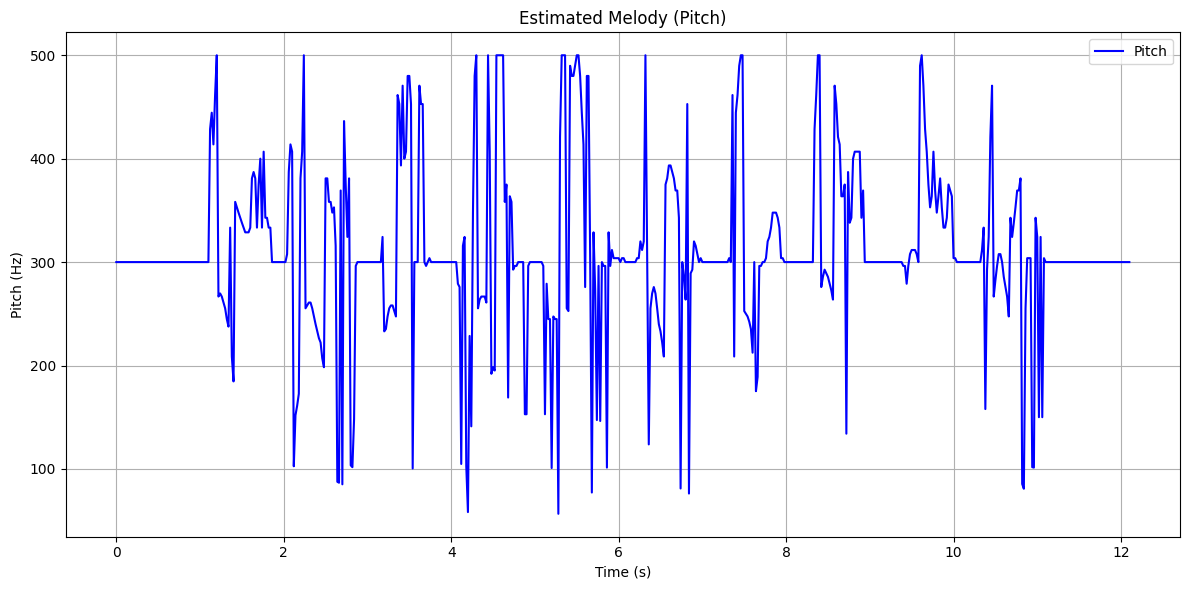

Melody saved as 'audio/melody.wav'.
Melody extraction successful. Audio saved and pitch plot displayed.


In [107]:
import numpy as np
import wave
import os
import matplotlib.pyplot as plt
filename= 'audio/filtered_audio.wav'
def read_wav(filename):
    with wave.open(filename, 'rb') as wav_file:
        sample_rate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        audio_data = np.frombuffer(wav_file.readframes(n_frames), dtype=np.int16)
    return sample_rate, audio_data

def autocorrelation(x):
    x = x - np.mean(x)
    max_abs = np.max(np.abs(x))
    if max_abs == 0:
        return np.zeros_like(x)
    x = x / max_abs
    corr = np.correlate(x, x, mode='full')
    return corr[len(corr) // 2:]

def estimate_pitch(audio, sample_rate, min_freq=50, max_freq=500):
    min_period = sample_rate // max_freq
    max_period = sample_rate // min_freq
    window_size = max_period * 2
    hop_size = window_size // 2
    pitches = []
    times = []

    for i in range(0, len(audio) - window_size, hop_size):
        window = audio[i:i + window_size]
        corr = autocorrelation(window)
        if np.all(corr == 0):
            pitches.append(np.nan)
            times.append(i / sample_rate)
            continue
        peak_index = np.argmax(corr[min_period:max_period]) + min_period
        pitch = sample_rate / peak_index
        pitches.append(pitch)
        times.append(i / sample_rate)

    return np.array(times), np.array(pitches)

def plot_pitch(times, pitches):
    plt.figure(figsize=(12, 6))
    plt.plot(times, pitches, label="Pitch", color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.title('Estimated Melody (Pitch)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def generate_melody_audio(pitches, times, duration, sample_rate):
    melody = np.zeros(int(sample_rate * duration))

    for i in range(len(pitches) - 1):
        if np.isnan(pitches[i]):
            continue
        freq = pitches[i]
        start_idx = int(times[i] * sample_rate)
        end_idx = int(times[i + 1] * sample_rate)
        t = np.linspace(0, (end_idx - start_idx) / sample_rate, end_idx - start_idx, endpoint=False)
        melody[start_idx:end_idx] = np.sin(2 * np.pi * freq * t)
    
    melody = (melody / np.max(np.abs(melody))) * 32767
    melody = melody.astype(np.int16)
    return melody

def save_melody_as_wav(filename, melody, sample_rate):
    with wave.open(filename, 'wb') as wav_file:
        wav_file.setnchannels(1)
        wav_file.setsampwidth(2)
        wav_file.setframerate(sample_rate)
        wav_file.writeframes(melody.tobytes())
    print(f"Melody saved as '{filename}'.")

# Main execution
if __name__ == "__main__":
    audio_file = r"audio/filtered_audio.wav"
    output_melody_file = r"audio/melody.wav"

    if os.path.exists(audio_file):
        try:
            sample_rate, audio_data = read_wav(audio_file)
            print(f"Sample Rate: {sample_rate}, Audio Length: {len(audio_data) / sample_rate:.2f} seconds")
            
            # Estimate the pitch
            times, pitches = estimate_pitch(audio_data, sample_rate)
            
            # Plot the pitch
            plot_pitch(times, pitches)
            
            # Generate the melody audio
            duration = len(audio_data) / sample_rate
            melody = generate_melody_audio(pitches, times, duration, sample_rate)
            
            # Save the melody
            save_melody_as_wav(output_melody_file, melody, sample_rate)
            
            print("Melody extraction successful. Audio saved and pitch plot displayed.")
        except Exception as e:
            print(f"An error occurred: {e}")
    else:
        print(f"Error: File '{audio_file}' not found.")


Chord Generation

In [108]:
import numpy as np
from scipy.signal import find_peaks
from scipy.io import wavfile  # For reading .wav files
file_path='audio/filtered_audio.wav'
# Define chord templates for recognition
CHORD_TEMPLATES = {
    # Major chords
    "C Major":    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],  # C-E-G
    "C# Major":   [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],  # C#-F-G#
    "D Major":    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],  # D-F#-A
    "Eb Major":   [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],  # Eb-G-Bb
    "E Major":    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],  # E-G#-B
    "F Major":    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # F-A-C
    "F# Major":   [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # F#-A#-C#
    "G Major":    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],  # G-B-D
    "Ab Major":   [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # Ab-C-Eb
    "A Major":    [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # A-C#-E
    "Bb Major":   [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],  # Bb-D-F
    "B Major":    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],  # B-D#-F#

    # Minor chords
    "C Minor":    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # C-Eb-G
    "C# Minor":   [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # C#-E-G#
    "D Minor":    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # D-F-A
    "Eb Minor":   [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],  # Eb-Gb-Bb
    "E Minor":    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],  # E-G-B
    "F Minor":    [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],  # F-Ab-C
    "F# Minor":   [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],  # F#-A-C#
    "G Minor":    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # G-Bb-D
    "Ab Minor":   [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],  # Ab-Cb-Eb
    "A Minor":    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # A-C-E
    "Bb Minor":   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],  # Bb-Db-F
    "B Minor":    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],  # B-D-F#
}

def detect_pitch_classes(signal, samplerate, frame_size=2048, hop_size=1024):
    """
    Detect the pitch classes (C, C#, D, ..., B) present in the audio signal.
    Uses a basic frequency spectrum analysis.
    """
    num_frames = 1 + (len(signal) - frame_size) // hop_size
    pitch_classes = np.zeros(12)  # 12 pitch classes (C, C#, ..., B)

    for i in range(num_frames):
        frame = signal[i * hop_size : i * hop_size + frame_size]
        spectrum = np.abs(np.fft.rfft(frame))  # Magnitude spectrum
        freqs = np.fft.rfftfreq(frame_size, 1 / samplerate)

        # Find peaks in the spectrum (significant frequencies)
        peaks, _ = find_peaks(spectrum, height=np.max(spectrum) * 0.1)
        for freq in freqs[peaks]:
            if freq > 0:  # Map frequency to pitch class
                midi_note = int(np.round(12 * np.log2(freq / 440.0) + 69)) % 12
                pitch_classes[midi_note] += 1

    return pitch_classes / np.max(pitch_classes)  # Normalize

def recognize_chord(pitch_classes):
    """
    Match detected pitch classes to the closest chord template.
    """
    max_similarity = 0
    recognized_chord = None

    for chord, template in CHORD_TEMPLATES.items():
        similarity = np.dot(pitch_classes, template)
        if similarity > max_similarity:
            max_similarity = similarity
            recognized_chord = chord

    return recognized_chord

def harmonize_chord(chord, rules="basic"):
    """
    Apply rule-based harmonization to generate complementary harmonies.
    """
    harmonization_rules = {
        # Major chords
        "C Major": ["C", "E", "G"],
        "C# Major": ["C#", "F", "G#"],
        "D Major": ["D", "F#", "A"],
        "Eb Major": ["Eb", "G", "Bb"],
        "E Major": ["E", "G#", "B"],
        "F Major": ["F", "A", "C"],
        "F# Major": ["F#", "A#", "C#"],
        "G Major": ["G", "B", "D"],
        "Ab Major": ["Ab", "C", "Eb"],
        "A Major": ["A", "C#", "E"],
        "Bb Major": ["Bb", "D", "F"],
        "B Major": ["B", "D#", "F#"],

        # Minor chords
        "C Minor": ["C", "Eb", "G"],
        "C# Minor": ["C#", "E", "G#"],
        "D Minor": ["D", "F", "A"],
        "Eb Minor": ["Eb", "Gb", "Bb"],
        "E Minor": ["E", "G", "B"],
        "F Minor": ["F", "Ab", "C"],
        "F# Minor": ["F#", "A", "C#"],
        "G Minor": ["G", "Bb", "D"],
        "Ab Minor": ["Ab", "Cb", "Eb"],
        "A Minor": ["A", "C", "E"],
        "Bb Minor": ["Bb", "Db", "F"],
        "B Minor": ["B", "D", "F#"],
    }

    # Return the harmonization if available, else default message
    return harmonization_rules.get(chord, ["Harmony rules not defined for this chord."])


    return harmonization_rules.get(chord, ["Harmony rules not defined for this chord."])

def process_wav_file(file_path):
    """
    Process the input .wav file, detect pitch classes, recognize chord, and harmonize it.
    """
    # Load the .wav file
    samplerate, signal = wavfile.read(file_path)

    # If the file has multiple channels (stereo), just take one channel (mono)
    if len(signal.shape) > 1:
        signal = signal[:, 0]  # Take the first channel (mono)

    # Normalize the signal
    signal = signal / np.max(np.abs(signal))

    # Step 1: Detect pitch classes
    pitch_classes = detect_pitch_classes(signal, samplerate)

    # Step 2: Recognize chord
    recognized_chord = recognize_chord(pitch_classes)
    print("Recognized Chord:", recognized_chord)

    # Step 3: Harmonize chord
    harmonies = harmonize_chord(recognized_chord)
    print("Harmonization:", harmonies)

# Example Usage
if __name__ == "__main__":
    process_wav_file("audio/filtered_audio.wav")


Recognized Chord: B Major
Harmonization: ['B', 'D#', 'F#']


Structural analysis

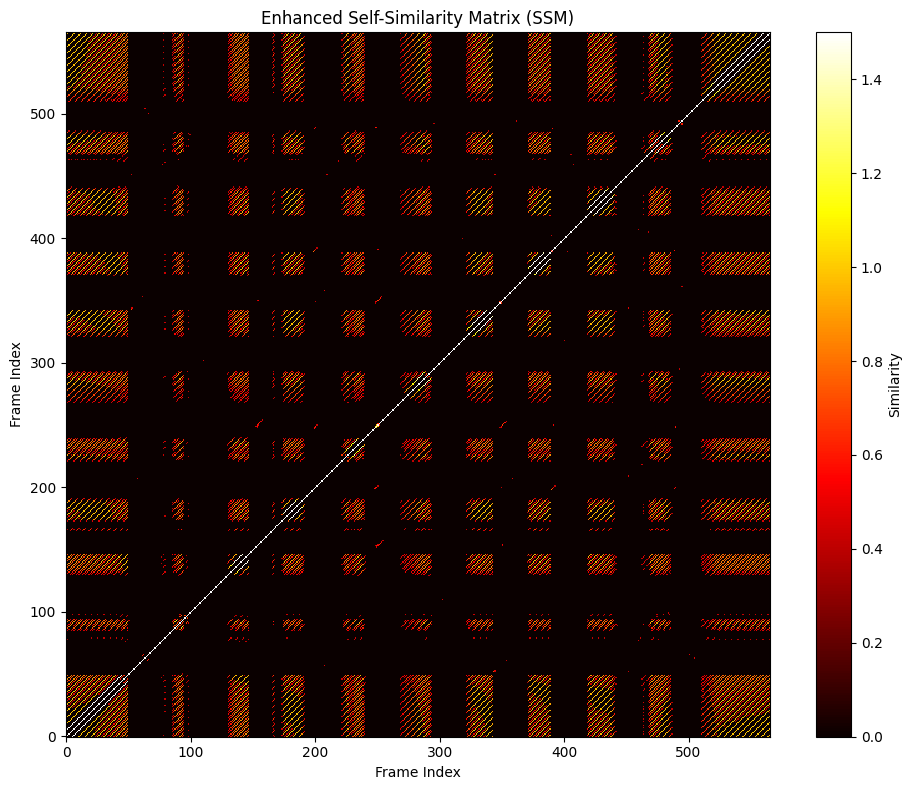

In [109]:
import numpy as np
from scipy.io import wavfile
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def compute_self_similarity_matrix(data, frame_size=2048, hop_size=512, metric='cosine'):
    """
    Compute a self-similarity matrix (SSM) for time-series data.
    
    Parameters:
    - data: Input time-series data (e.g., audio waveform).
    - frame_size: Size of each frame for analysis.
    - hop_size: Step size for overlapping frames.
    - metric: Similarity metric ('cosine', 'euclidean', etc.).
    
    Returns:
    - ssm: Self-similarity matrix.
    """
    # Frame segmentation
    num_frames = 1 + (len(data) - frame_size) // hop_size
    frames = np.array([data[i * hop_size : i * hop_size + frame_size] for i in range(num_frames)])
    
    # Normalize frames (important for cosine similarity)
    frames = frames / (np.linalg.norm(frames, axis=1, keepdims=True) + 1e-9)
    
    # Compute similarity matrix
    ssm = 1 - cdist(frames, frames, metric=metric)
    
    return ssm

def enhance_ssm(ssm, threshold=0.5, diagonal_width=3):
    """
    Enhance the self-similarity matrix by applying diagonal enhancement and thresholding.
    
    Parameters:
    - ssm: Input self-similarity matrix.
    - threshold: Threshold for similarity values.
    - diagonal_width: Width of the diagonal filter.
    
    Returns:
    - enhanced_ssm: Enhanced self-similarity matrix.
    """
    # Apply thresholding
    ssm[ssm < threshold] = 0
    
    # Diagonal enhancement
    for i in range(ssm.shape[0]):
        for j in range(ssm.shape[1]):
            if abs(i - j) <= diagonal_width:
                ssm[i, j] = max(ssm[i, j], ssm[i, j] * 1.5)  # Enhance diagonal values
    
    return ssm

# Load the WAV file
file_path = "audio/filtered_audio.wav"  # Replace with your file path
samplerate, data = wavfile.read(file_path)

# If stereo, convert to mono
if len(data.shape) > 1:
    data = data[:, 0]

# Normalize the audio data
data = data / np.max(np.abs(data))

# Compute the SSM
ssm = compute_self_similarity_matrix(data, frame_size=2048, hop_size=512, metric='cosine')

# Enhance the SSM
enhanced_ssm = enhance_ssm(ssm, threshold=0.4, diagonal_width=5)

# Visualize the Enhanced SSM
plt.figure(figsize=(10, 8))
plt.imshow(enhanced_ssm, cmap='hot', interpolation='nearest', origin='lower')
plt.title("Enhanced Self-Similarity Matrix (SSM)")
plt.xlabel("Frame Index")
plt.ylabel("Frame Index")
plt.colorbar(label='Similarity')
plt.tight_layout()
plt.show()


In [110]:
import numpy as np
import wave
from midiutil import MIDIFile

# Create a simple sine wave for each MIDI note
def midi_to_frequency(midi_note):
    """Converts MIDI note to frequency in Hz."""
    return 440.0 * (2 ** ((midi_note - 69) / 12.0))

def generate_sine_wave(frequency, duration, sample_rate=44100, amplitude=32767):
    """Generates a sine wave for a given frequency and duration."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * frequency * t)
    return wave.astype(np.int16)

def generate_accompaniment(midi_notes, durations, sample_rate=44100):
    """Generates WAV accompaniment from a sequence of MIDI notes and durations."""
    audio = np.array([], dtype=np.int16)
    for note, duration in zip(midi_notes, durations):
        if note is None:  # Rest
            silence = np.zeros(int(sample_rate * duration), dtype=np.int16)
            audio = np.concatenate((audio, silence))
        else:
            frequency = midi_to_frequency(note)
            wave = generate_sine_wave(frequency, duration, sample_rate)
            audio = np.concatenate((audio, wave))
    return audio

def save_wav(file_path, audio_data, sample_rate=44100):
    """Saves audio data to a .wav file."""
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(1)  # Mono
        wf.setsampwidth(2)  # 16-bit PCM
        wf.setframerate(sample_rate)
        wf.writeframes(audio_data.tobytes())

def create_midi_file(midi_notes, durations, output_path):
    """Creates a MIDI file with melody and chords."""
    midi = MIDIFile(1)  # One track
    track = 0
    time = 0  # Start time
    channel = 0
    velocity = 100
    midi.addTempo(track, time, 120)

    for note, duration in zip(midi_notes, durations):
        if note is not None:
            midi.addNote(track, channel, note, time, duration, velocity)
        time += duration

    with open(output_path, "wb") as output_file:
        midi.writeFile(output_file)
    print(f"MIDI saved to {output_path}")

# Main function to generate accompaniment
def main():
    # Example MIDI notes and durations (C Major chord progression)
    midi_notes = [60, 64, 67, 72, None, 65, 69, 72]  # C-E-G, C, F-A-C
    durations = [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]  # Duration in seconds

    # Generate WAV accompaniment
    accompaniment = generate_accompaniment(midi_notes, durations)
    wav_path = "audio/accompaniment.wav"
    save_wav(wav_path, accompaniment)
    print(f"WAV accompaniment saved to {wav_path}")

    # Generate MIDI file
    midi_path = "audio/accompaniment.midi"
    create_midi_file(midi_notes, durations, midi_path)

if __name__ == "__main__":
    main()


WAV accompaniment saved to audio/accompaniment.wav
MIDI saved to audio/accompaniment.midi
